# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as scikit_learn

# Carga/Slicing de datos

In [21]:
dataset = np.load('proyecto_training_data.npy')
trainData = dataset[0:int(len(dataset)*0.8)]
testData = dataset[int(len(dataset)*0.8):len(dataset)]

dataframe = pd.DataFrame(dataset, columns = ['SalePrice','OverallQual','1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
trainDataFrame = pd.DataFrame(trainData, columns = ['SalePrice','OverallQual','1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
testDataFrame = pd.DataFrame(testData, columns = ['SalePrice','OverallQual','1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])

display(dataframe)

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [41]:
cols_na = [col for col in dataframe if dataframe[col].isnull().mean()]
for col in cols_na:
  print(f'''{col}-{dataframe[col].isnull().mean()}''')
print(f'''\n{cols_na}\n''')
print(dataframe[cols_na].dtypes)

LotFrontage-0.1773972602739726

['LotFrontage']

LotFrontage    float64
dtype: object


In [42]:
dataframe['LotFrontageMean'] = np.round(dataframe['LotFrontage'].fillna(dataframe['LotFrontage'].mean()))
dataframe['LotFrontageMedian'] = np.round(dataframe['LotFrontage'].fillna(dataframe['LotFrontage'].median()))


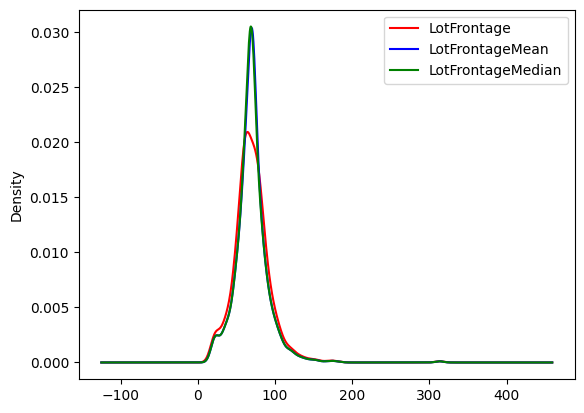

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataframe['LotFrontage'].plot.density(color='red', label='LotFrontage')
dataframe['LotFrontageMean'].plot.density(color='blue', label='LotFrontageMean')
dataframe['LotFrontageMedian'].plot.density(color='green', label='LotFrontageMedian')
ax.legend()
plt.show()

# Analisis Exploratorio por Variable


#### Sale Price

In [45]:
print(f'''Media: {dataframe['SalePrice'].mean()}''')
print(f'''Valor Maximo: {dataframe['SalePrice'].max()}''')
print(f'''Valor Minimo: {dataframe['SalePrice'].min()}''')
print(f'''Rango: {dataframe['SalePrice'].max() - dataframe['SalePrice'].min()}''')
print(f'''Desviacion Estandar: {dataframe['SalePrice'].std()}''')

Media: 180921.19589041095
Valor Maximo: 755000.0
Valor Minimo: 34900.0
Rango: 720100.0
Desviacion Estandar: 79442.50288288662


#### Overall Quality

In [46]:
print(f'''Media: {dataframe['OverallQual'].mean()}''')
print(f'''Valor Maximo: {dataframe['OverallQual'].max()}''')
print(f'''Valor Minimo: {dataframe['OverallQual'].min()}''')
print(f'''Rango: {dataframe['OverallQual'].max() - dataframe['OverallQual'].min()}''')
print(f'''Desviacion Estandar: {dataframe['OverallQual'].std()}''')

Media: 6.0993150684931505
Valor Maximo: 10.0
Valor Minimo: 1.0
Rango: 9.0
Desviacion Estandar: 1.3829965467415934


#### First Floor square feet

In [47]:
print(f'''Media: {dataframe['1stFlrSF'].mean()}''')
print(f'''Valor Maximo: {dataframe['1stFlrSF'].max()}''')
print(f'''Valor Minimo: {dataframe['1stFlrSF'].min()}''')
print(f'''Rango: {dataframe['1stFlrSF'].max() - dataframe['1stFlrSF'].min()}''')
print(f'''Desviacion Estandar: {dataframe['1stFlrSF'].std()}''')

Media: 1162.626712328767
Valor Maximo: 4692.0
Valor Minimo: 334.0
Rango: 4358.0
Desviacion Estandar: 386.5877380410744


#### Total rooms above grade

In [48]:
print(f'''Media: {dataframe['TotRmsAbvGrd'].mean()}''')
print(f'''Valor Maximo: {dataframe['TotRmsAbvGrd'].max()}''')
print(f'''Valor Minimo: {dataframe['TotRmsAbvGrd'].min()}''')
print(f'''Rango: {dataframe['TotRmsAbvGrd'].max() - dataframe['TotRmsAbvGrd'].min()}''')
print(f'''Desviacion Estandar: {dataframe['TotRmsAbvGrd'].std()}''')

Media: 6.517808219178082
Valor Maximo: 14.0
Valor Minimo: 2.0
Rango: 12.0
Desviacion Estandar: 1.6253932905840505


#### Year Built

In [51]:
print(f'''Media: {dataframe['YearBuilt'].mean()}''')
print(f'''Valor Maximo: {dataframe['YearBuilt'].max()}''')
print(f'''Valor Minimo: {dataframe['YearBuilt'].min()}''')
print(f'''Rango: {dataframe['YearBuilt'].max() - dataframe['YearBuilt'].min()}''')
print(f'''Desviacion Estandar: {dataframe['YearBuilt'].std()}''')

Media: 1971.267808219178
Valor Maximo: 2010.0
Valor Minimo: 1872.0
Rango: 138.0
Desviacion Estandar: 30.202904042525258


#### Lot Frontage

In [52]:
print(f'''Media: {dataframe['LotFrontage'].mean()}''')
print(f'''Valor Maximo: {dataframe['LotFrontage'].max()}''')
print(f'''Valor Minimo: {dataframe['LotFrontage'].min()}''')
print(f'''Rango: {dataframe['LotFrontage'].max() - dataframe['LotFrontage'].min()}''')
print(f'''Desviacion Estandar: {dataframe['LotFrontage'].std()}''')

Media: 70.04995836802665
Valor Maximo: 313.0
Valor Minimo: 21.0
Rango: 292.0
Desviacion Estandar: 24.284751774483208


# Histograma por variable

<Axes: xlabel='SalePrice', ylabel='Count'>

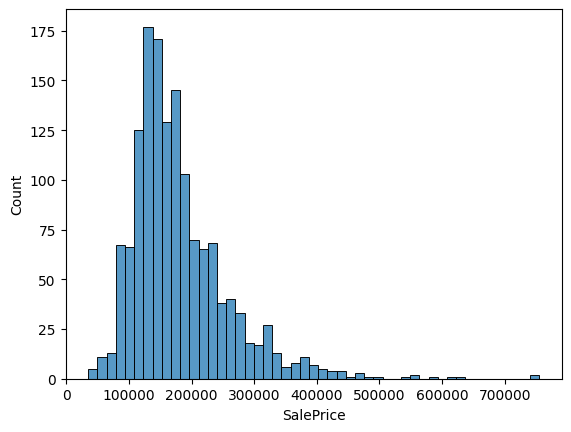

In [61]:
sns.histplot(dataframe['SalePrice'])

<Axes: xlabel='OverallQual', ylabel='Count'>

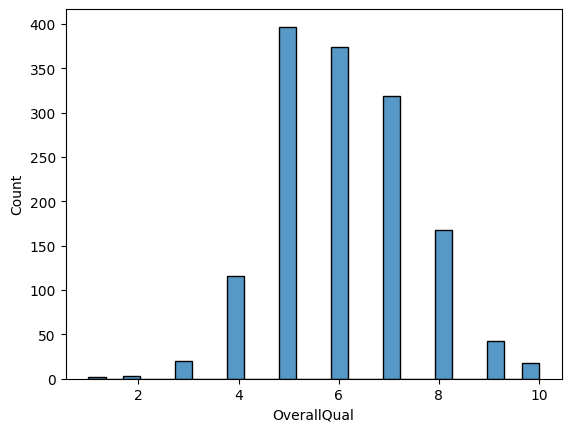

In [62]:
sns.histplot(dataframe['OverallQual'])

<Axes: xlabel='1stFlrSF', ylabel='Count'>

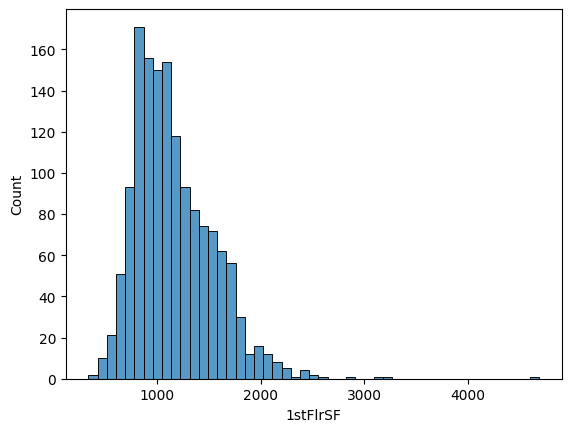

In [63]:
sns.histplot(dataframe['1stFlrSF'])

<Axes: xlabel='TotRmsAbvGrd', ylabel='Count'>

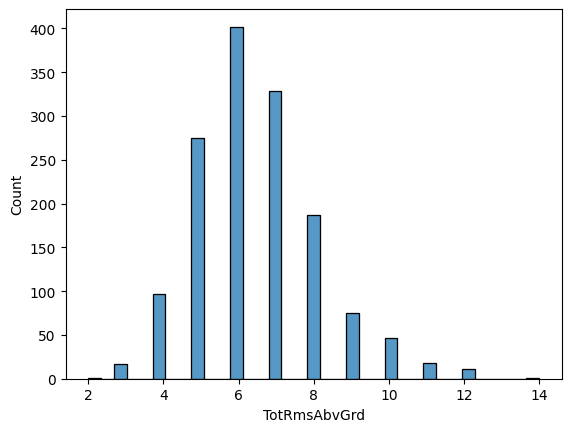

In [64]:
sns.histplot(dataframe['TotRmsAbvGrd'])

<Axes: xlabel='YearBuilt', ylabel='Count'>

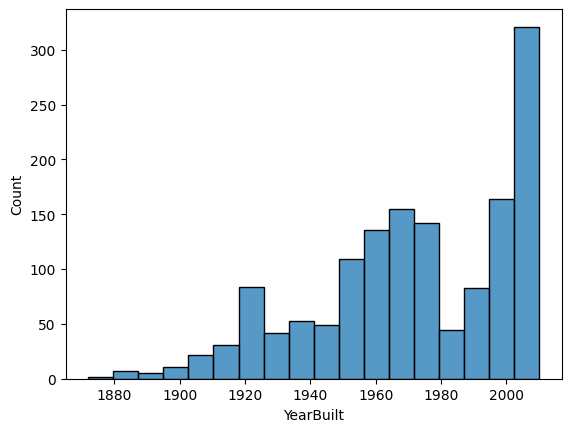

In [65]:
sns.histplot(dataframe['YearBuilt'])

<Axes: xlabel='LotFrontage', ylabel='Count'>

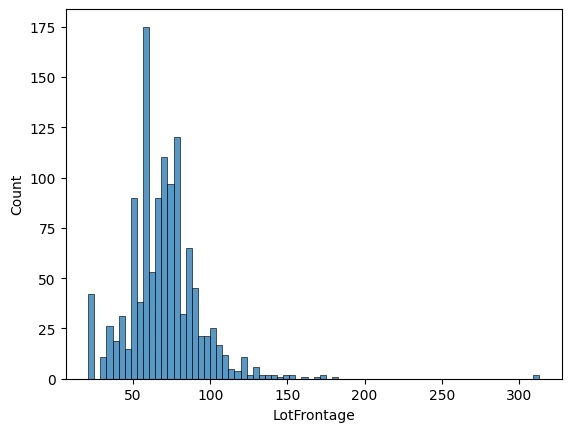

In [66]:
sns.histplot(dataframe['LotFrontage'])

# Correlacion